<a href="https://colab.research.google.com/github/VaneezaAhmad/Text-Prediction/blob/main/predictive_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import nltk
from nltk import word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist

In [4]:
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
from keras.wrappers.scikit_learn import KerasClassifier

# Read in Data

In [8]:
from google.colab import files
uploaded = files.upload()

Saving wonderland.txt to wonderland.txt


In [87]:
alice =  open("wonderland.txt", "r", encoding="utf_8").read()
alice= alice.lower() 

# Preprocessing the Data

In [10]:
# create mapping of unique chars to integers
chars = sorted(list(set(alice)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [11]:
print(chars)

['\n', ' ', '!', '#', '$', '%', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']


In [12]:
n_chars = len(alice)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  163816
Total Vocab:  60


In [13]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [86]:
# tokenized = word_tokenize(alice)

In [88]:
tokenized = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
alice_token = tokenized.tokenize(alice)

In [89]:
len(alice_token)

29763

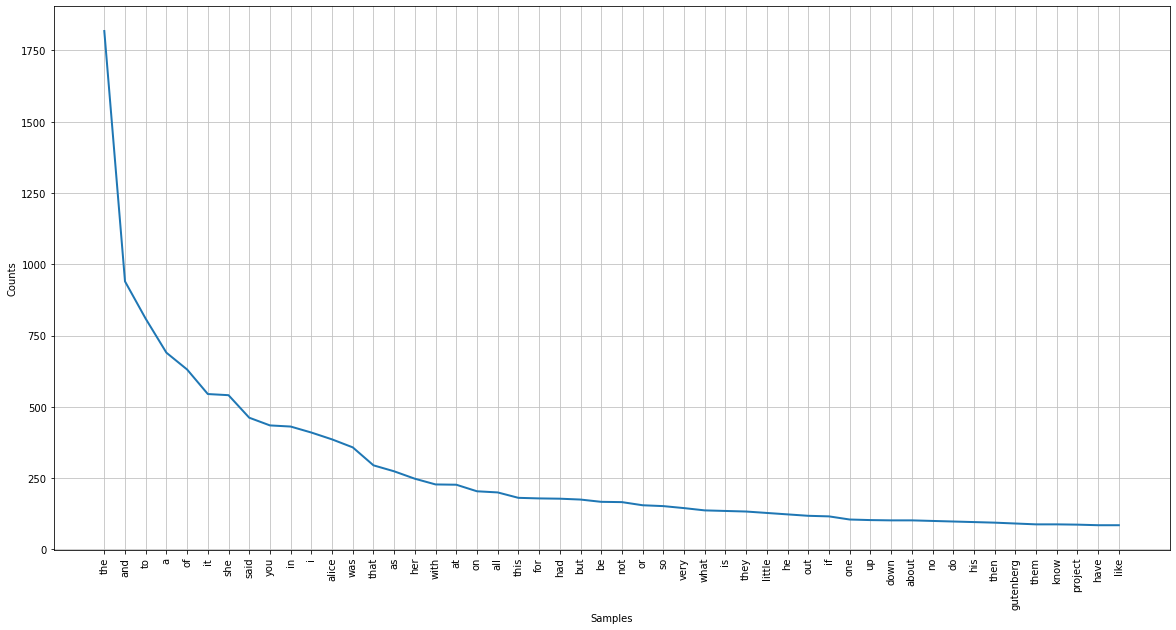

In [17]:
# Frequency distribution of words 
fdist = FreqDist(alice_token)
plt.figure(figsize=(20, 10))
fdist.plot(50);

In [18]:
unique = list(set(alice_token))

In [19]:
len(unique)

3075

In [20]:
WORD_LENGTH = 3
prev_words = []
next_words = []
for i in range(len(alice_token) - WORD_LENGTH):
    prev_words.append(alice_token[i:i + WORD_LENGTH])
    next_words.append(alice_token[i + WORD_LENGTH])
print(prev_words[:5])
print(next_words[:5])

[['project', 'gutenberg’s', 'alice’s'], ['gutenberg’s', 'alice’s', 'adventures'], ['alice’s', 'adventures', 'in'], ['adventures', 'in', 'wonderland'], ['in', 'wonderland', 'by']]
['adventures', 'in', 'wonderland', 'by', 'lewis']


In [21]:
unique_words = np.unique(alice_token)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [22]:
len(unique_words)

3075

In [23]:
unique_words

array(['a', 'abide', 'able', ..., 'zealand', 'zigzag', 'zip'],
      dtype='<U16')

In [24]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    y[i, unique_word_index[next_words[i]]] = 1

In [25]:
len(X), len(y), X.shape, y.shape

(29760, 29760, (29760, 3, 3075), (29760, 3075))

# First Model

In [26]:
model = Sequential()
model.add(LSTM(32, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation("softmax"))

In [27]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(X,y, epochs=100, batch_size=64, validation_split=0.05).history

Epoch 1/100
442/442 [==============================] - 30s 27ms/step - loss: 6.3804 - accuracy: 0.0587 - val_loss: 7.1188 - val_accuracy: 0.0874
Epoch 2/100
442/442 [==============================] - 11s 25ms/step - loss: 5.5471 - accuracy: 0.1111 - val_loss: 7.5208 - val_accuracy: 0.1069
Epoch 3/100
442/442 [==============================] - 11s 25ms/step - loss: 5.3878 - accuracy: 0.1465 - val_loss: 8.3033 - val_accuracy: 0.1129
Epoch 4/100
442/442 [==============================] - 11s 26ms/step - loss: 5.4033 - accuracy: 0.1737 - val_loss: 8.7394 - val_accuracy: 0.1176
Epoch 5/100
442/442 [==============================] - 12s 26ms/step - loss: 5.4021 - accuracy: 0.1959 - val_loss: 8.9089 - val_accuracy: 0.1163
Epoch 6/100
442/442 [==============================] - 12s 26ms/step - loss: 5.3183 - accuracy: 0.2162 - val_loss: 9.0018 - val_accuracy: 0.1176
Epoch 7/100
442/442 [==============================] - 11s 26ms/step - loss: 5.2379 - accuracy: 0.2402 - val_loss: 9.0610 - val_ac

## Save model

In [28]:
import pickle

In [29]:
model.save('first_model.h5')
pickle.dump(history, open("history.p", "wb"))

## Load model to evaluate

In [30]:
model = load_model('first_model.h5')
history = pickle.load(open("history.p", "rb"))

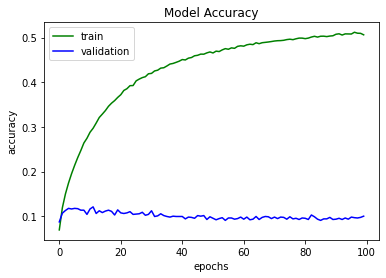

In [31]:
plt.plot(history["accuracy"], color="green")
plt.plot(history["val_accuracy"], color="blue")
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train", "validation"]);

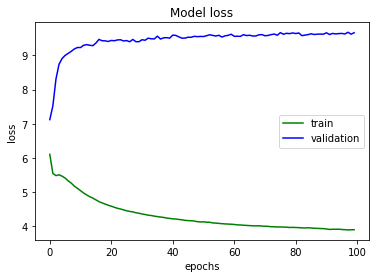

In [32]:
plt.plot(history["loss"], color="green")
plt.plot(history["val_loss"], color="blue")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "validation"]);

# Grid Search

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
def create_model(optimizer="RMSprop(learning_rate=0.01)"):
    model = Sequential()
    model.add(LSTM(64, input_shape=(WORD_LENGTH, len(unique_words))))
    model.add(Dense(len(unique_words)))
    model.add(Activation("softmax"))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model


In [140]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [141]:
param_grid = {
    'epochs': [50,100], 
    'batch_size':[32,62,128],
    'optimizer':['RMSprop', 'Adam'],
    # 'kc__dropout': [0.5, 0.4, 0.3, 0.2, 0.1, 0]
}

In [142]:
kfold_splits = 3
grid = GridSearchCV(model,  
                    n_jobs=1, 
                    verbose=1,
                    return_train_score=True,
                    cv=kfold_splits,  #StratifiedKFold(n_splits=kfold_splits, shuffle=True)
                    param_grid=param_grid)

In [ ]:
grid_result = grid.fit(X, y) #callbacks=[tbCallBack]


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/50
744/744 [==============================] - 19s 23ms/step - loss: 6.7497 - accuracy: 0.0634
Epoch 2/50
744/744 [==============================] - 17s 23ms/step - loss: 6.1037 - accuracy: 0.0650
Epoch 3/50
744/744 [==============================] - 17s 23ms/step - loss: 6.0363 - accuracy: 0.0657
Epoch 4/50
744/744 [==============================] - 17s 23ms/step - loss: 5.9182 - accuracy: 0.0704
Epoch 5/50
744/744 [==============================] - 17s 22ms/step - loss: 5.7939 - accuracy: 0.0810
Epoch 6/50
744/744 [==============================] - 17s 23ms/step - loss: 5.6886 - accuracy: 0.0932
Epoch 7/50
744/744 [==============================] - 17s 23ms/step - loss: 5.5853 - accuracy: 0.0999
Epoch 8/50
744/744 [==============================] - 17s 23ms/step - loss: 5.5252 - accuracy: 0.1105
Epoch 9/50
744/744 [==============================] - 17s 23ms/step - loss: 5.4203 - accuracy: 0.1249
Epoch 10/50
744/744 [==============================] - 17s 23ms/step - loss: 5.322

In [1]:

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [56]:
pred= grid_result.predict(X)

 11/930 [..............................] - ETA: 9s

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


930/930 [==============================] - 6s 6ms/step


# Add layers

In [1]:
from tensorflow.keras.callbacks import EarlyStopping


In [69]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(LSTM(128))
model.add(Dense(len(unique_words), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(unique_words), activation="relu"))
model.add(Dropout(0.2))
model.add(Activation("softmax"))

optimizer = RMSprop(learning_rate=0.1)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-4,
                           verbose=1,
                           mode='min', patience=5)

results=model.fit(X,y, epochs=50, batch_size=64, validation_split=0.05).history

Epoch 1/50
442/442 [==============================] - 88s 188ms/step - loss: 7.8295 - accuracy: 0.0463 - val_loss: 7.5339 - val_accuracy: 0.0370
Epoch 2/50
442/442 [==============================] - 82s 186ms/step - loss: 7.4165 - accuracy: 0.0822 - val_loss: 7.5083 - val_accuracy: 0.0665
Epoch 3/50
442/442 [==============================] - 83s 187ms/step - loss: 7.3768 - accuracy: 0.0901 - val_loss: 7.5212 - val_accuracy: 0.0692
Epoch 4/50
442/442 [==============================] - 83s 188ms/step - loss: 7.3108 - accuracy: 0.0992 - val_loss: 7.5772 - val_accuracy: 0.0544
Epoch 5/50
442/442 [==============================] - 83s 188ms/step - loss: 7.2364 - accuracy: 0.1109 - val_loss: 7.5975 - val_accuracy: 0.0638
Epoch 6/50
442/442 [==============================] - 83s 188ms/step - loss: 7.2054 - accuracy: 0.1154 - val_loss: 7.7889 - val_accuracy: 0.0578
Epoch 7/50
442/442 [==============================] - 83s 189ms/step - loss: 7.1795 - accuracy: 0.1182 - val_loss: 7.7510 - val_ac

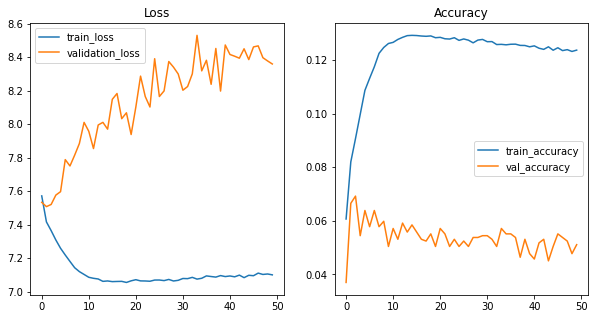

In [70]:
train_loss = results['loss']
train_acc = results['accuracy']
val_loss =results['val_loss']
val_acc = results['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='validation_loss')
ax1.set_title("Loss")
ax1.legend()

ax2.plot(train_acc, label='train_accuracy')
ax2.plot(val_acc, label='val_accuracy')
ax2.set_title("Accuracy")
ax2.legend()

# Generate Predictive text

In [99]:
model.output_shape

(None, 3075)

In [117]:
sequence=tokenized.tokenize("in the rabbit hole")
sequence = np.array(sequence)
        
preds = model.predict([sequence])
# print(preds)
sequence

ValueError: ignored

In [92]:
def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.
    
    """
    for i in range(3):
        sequence = tokenized.tokenize(text)
        sequence = np.array(sequence)
        
        preds = model.predict_classes(sequence)
        # print(preds)
        predicted_word = ""
        
        for key, value in tokenized:
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [95]:
Predict_Next_Words(model, tokenized, "she fell in the")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

In [94]:
while(True):

    text = input("Enter your line: ")
    
    if text == "stop the script":
        print("Ending The Program.....")
        break
    
    else:
        # try:
        print("hello")
        text = text.split(" ")
        text = text[-1]

        text = ''.join(text)
        Predict_Next_Words(model, tokenized, text)
            
        # except:
        continue

Enter your line: fell in the
hello


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

In [119]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not".lower())

it
is
not


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [120]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [121]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [126]:
q =  input("ENTER TEXT")
print("correct sentence: ",q)
seq = " ".join(tokenized.tokenize(q.lower())[0:3])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

ENTER TEXTFELL IN THE
correct sentence:  FELL IN THE
Sequence:  fell in the
fell
in
the
next possible words:  ['a', 'had', 'that', 'have', 'same']
